Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


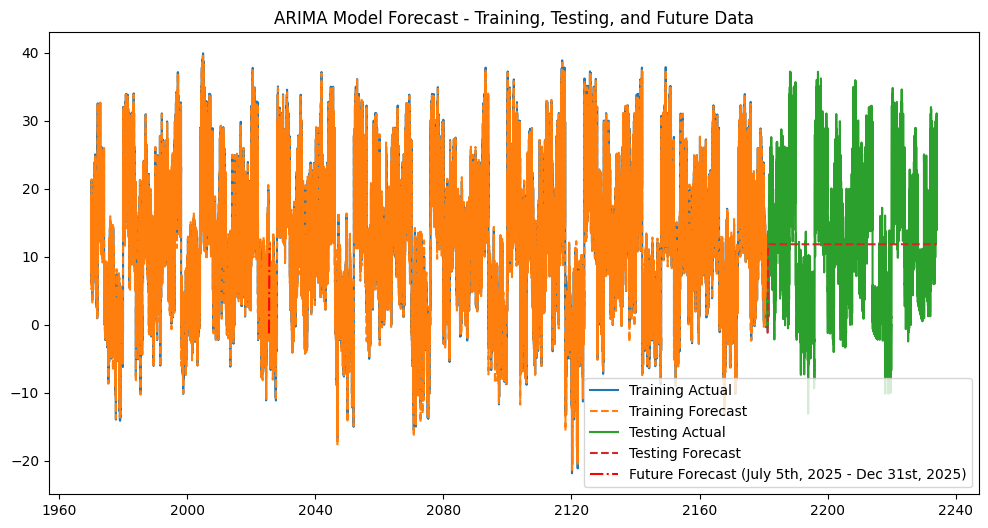

Training Data - MAE: 0.9435870416022228, MSE: 2.2090004848040152, RMSE: 1.4862706633732683, MAPE: 14271307432092.596
Testing Data - MAE: 7.490559120324581, MSE: 80.69678856321488, RMSE: 8.983139126341909, MAPE: 46982527854981.53
Forecast saved to 'forecast_july5_to_dec31_2025.csv'


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Load your dataset (make sure to update the file path)
data = pd.read_csv('weatherHistory 1.csv')
 
# Check if the 'Temperature (C)' column exists
print(data.columns)
 
# Define 'target' as the column you're trying to predict (e.g., 'Temperature (C)')
target = data['Temperature (C)']
 
# Step 1: Split the data into training and testing sets
train_size = int(len(target) * 0.8)  # 80% for training, 20% for testing
train, test = target[:train_size], target[train_size:]
 
# Step 2: Train the ARIMA model on the training set
model_train = ARIMA(train, order=(2, 0, 2))  # Use the same order for consistency
model_train_fit = model_train.fit()
 
# Step 3: In-sample forecast (training data prediction)
train_forecast = model_train_fit.fittedvalues
 
# Step 4: Out-of-sample forecast (testing data prediction)
test_forecast = model_train_fit.forecast(steps=len(test))
 
# Step 5: Predict the next 4 months (steps)
# From July 5th, 2025 to December 31st, 2025
start_date = pd.to_datetime('2025-07-05')
end_date = pd.to_datetime('2025-12-31')
 
# Calculate the number of days between the start and end date
num_days = (end_date - start_date).days
 
# Forecast for the calculated number of days
future_forecast = model_train_fit.forecast(steps=num_days)
 
# Create a new time index for the forecasted data (next 4 months from July 5th, 2025)
forecast_index = pd.date_range(start=start_date, periods=num_days + 1, freq='D')[1:]
 
# Step 6: Plot the actual vs forecasted values for training, testing, and future data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Actual')
plt.plot(train.index, train_forecast, label='Training Forecast', linestyle='--')
plt.plot(test.index, test, label='Testing Actual')
plt.plot(test.index, test_forecast, label='Testing Forecast', linestyle='--')
plt.plot(forecast_index, future_forecast, label='Future Forecast (July 5th, 2025 - Dec 31st, 2025)', linestyle='-.', color='red')
plt.title("ARIMA Model Forecast - Training, Testing, and Future Data")
plt.legend()
plt.show()
 
# Step 7: Evaluate the model's performance on both training and testing data
 
# Training data evaluation
train_mae = mean_absolute_error(train, train_forecast)
train_mse = mean_squared_error(train, train_forecast)
train_rmse = np.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(train, train_forecast)
 
print(f"Training Data - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}, MAPE: {train_mape}")
 
# Testing data evaluation
test_mae = mean_absolute_error(test, test_forecast)
test_mse = mean_squared_error(test, test_forecast)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(test, test_forecast)
 
print(f"Testing Data - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}, MAPE: {test_mape}")
# Step 8: Save the future forecast to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Temperature (C)': future_forecast
})
 
# Save to CSV
forecast_df.to_csv('forecast_july5_to_dec31_2025.csv', index=False)
print("Forecast saved to 'forecast_july5_to_dec31_2025.csv'")